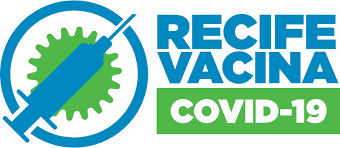

# **Cobertura vacinal contra Covid-19 em Recife-PE**

**Objetivo:** Analisar a cobertura vacinal contra a Covid-19 em Recife, utilizando dados sobre idade, sexo e total de pessoas vacinadas.

O projeto visa fornecer insights que possam contribuir para o aprimoramento das estratégias de saúde pública na cidade.

* Dados públicos extraídos de: https://conectalps.recife.pe.gov.br/vacinometro/

In [1]:
# Importando bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches




**1. Exploração de Dados**

In [2]:
# URL do site com as tabelas

url = 'https://conectalps.recife.pe.gov.br/vacinometro/'

In [3]:
# Lendo todas as tabelas da página

tabela1 = pd.read_html(url)

# Exibindo a primeira tabela encontrada (doses aplicadas por sexo)

df_sexo = tabela1[0]

df_sexo.head()

,Sexo,Dose 1,Dose 2,Primeiro Reforço,Segundo Reforço,Terceiro Reforço,Dose Única
0,Feminino,876580,826747,632028,305607,65746,32882
1,Masculino,706289,645826,453934,185613,37084,31000
2,Outros,4794,4878,5815,739,172,73
3,Total Geral,1587663,1477451,1091777,491959,103002,63955


In [4]:
# Lendo todas as tabelas da página

tabela2 = pd.read_html(url)

# Exibindo a segunda tabela encontrada (doses aplicadas por raça/cor)

df_raca = tabela2[1]

df_raca.head()

,Raça/Cor,Dose 1,Dose 2,Primeiro Reforço,Segundo Reforço,Terceiro Reforço,Dose única
0,Amarela,44953,34807,28963,14673,3089,1941
1,Branca,586588,557194,424986,211074,54942,21544
2,Indígena*,5716,5010,3183,1157,214,236
3,Parda,749928,691454,494111,205616,35962,31103
4,Preta,196801,184841,132822,52913,8697,9107


**2. Tratamento de Dados**

In [6]:
# Transformando o DataFrame df_sexo para o formato longo (melt)

df_long_sexo = pd.melt(df_sexo, id_vars='Sexo',
                  value_vars=['Dose 1', 'Dose 2', 'Primeiro Reforço', 'Segundo Reforço', 'Terceiro Reforço', 'Dose Única'],
                  var_name='Dose', value_name='Total')
# Visualizando o DataFrame transformado

df_long_sexo.head()

,Sexo,Dose,Total
0,Feminino,Dose 1,876580
1,Masculino,Dose 1,706289
2,Outros,Dose 1,4794
3,Total Geral,Dose 1,1587663
4,Feminino,Dose 2,826747


In [29]:
# Transformando para formato longo (melt)
df_long_raca = pd.melt(df_raca, id_vars=['Raça/Cor'],
                        value_vars=['Dose 1', 'Dose 2', 'Primeiro Reforço',
                                    'Segundo Reforço', 'Terceiro Reforço', 'Dose única'],
                        var_name='Dose', value_name='Total')

# Convertendo a coluna 'Total' para numérico e tratando valores NaN
df_long_raca['Total'] = pd.to_numeric(df_long_raca['Total'], errors='coerce').fillna(0)

# Somando o total de doses por Raça/Cor
df_raca_soma = df_long_raca.groupby('Raça/Cor', as_index=False)['Total'].sum()

# Exibindo os resultados
df_raca_soma


,Raça/Cor,Total
0,Amarela,128426
1,Branca,1856328
2,Ignorado,22182
3,Indígena*,15516
4,Parda,2208174
5,Preta,585181
6,Total Geral,4815807


In [ ]:
df_long_sexo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sexo    24 non-null     object
 1   Dose    24 non-null     object
 2   Total   24 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 708.0+ bytes


In [ ]:
df_long_raca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Raça/Cor  42 non-null     object
 1   Dose      42 non-null     object
 2   Total     42 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [ ]:
df_sexo.isna().any()

,0
Sexo,False
Dose 1,False
Dose 2,False
Primeiro Reforço,False
Segundo Reforço,False
Terceiro Reforço,False
Dose Única,False


In [ ]:
df_long_raca.isna().any()

,0
Raça/Cor,False
Dose,False
Total,False


**3. Vizualização**

3.1. Grafico de Número de doses aplicadas da vacina contra Covid-19, segundo sexo

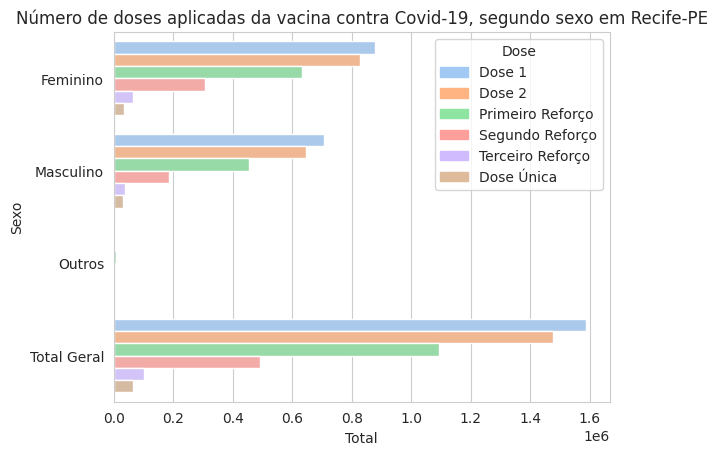

In [9]:
# Visualização

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(
      data=df_long_sexo,
      x="Total",
      y="Sexo",
      hue="Dose",
      palette="pastel",
      legend=False
  )
  grafico.set(title='Número de doses aplicadas da vacina contra Covid-19, segundo sexo em Recife-PE', xlabel='Total', ylabel='Sexo' );

  # Criar elementos para a legenda com as cores
  handles = [mpatches.Patch(color=color, label=dose) for dose, color in zip(df_long_sexo['Dose'].unique(), sns.color_palette("pastel"))]

  # Adicionar a legenda com as cores
  grafico.legend(handles=handles, title='Dose')

Analisando o gráfico, é possível observar que a aplicação das doses teve uma adesão maior no público femino em comparação ao masculino. Já em relação a aplicação das doses de reforço (Primeira, segunda, terceira e dose única), se nota uma redução gradativa, o que pode sugerir uma queda na adesão confome aumento no número de roforços.

3.2 Total de doses aplicadas por Raça/Cor

<ipython-input-30-b8831f9f43ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Raça/Cor', y='Total', data=df_raca_soma, palette='muted')


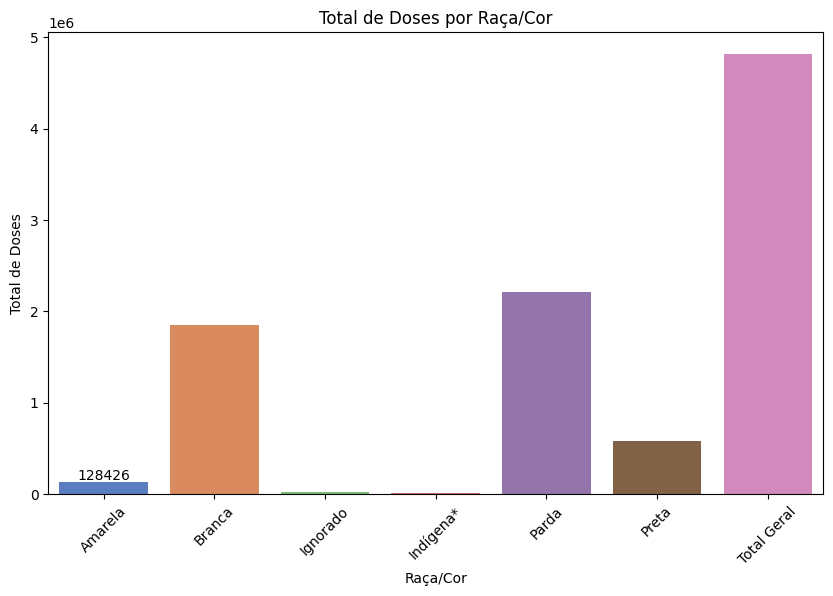

In [30]:
# Gráfico de barras corrigido
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Raça/Cor', y='Total', data=df_raca_soma, palette='muted')

# Ajustando os valores do eixo Y para exibir corretamente a soma das doses
ax.bar_label(ax.containers[0])  # Adiciona os valores no topo das barras

plt.title('Total de Doses por Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Total de Doses')
plt.xticks(rotation=45)
plt.yticks()  # Garante que os valores do eixo Y sejam exibidos corretamente
plt.show()


De acordo com o resultado do gráfico, observou-se uma maior adesão para as pessoas que se autodeclaram como pardas, com um total de 2.208.174 doses aplicadas. Em seguida, o público branco foi o que mais recebeu doses, com um total de 1.856.328 doses. Por outro lado, a adesão foi consideravelmente menor entre as pessoas que se declararam pretas (585.181 doses) e amarelas (128.426 doses), evidenciando uma redução notória na cobertura vacinal desses grupos. A categoria indígena, representando um total de 15.516 doses, também apresentou uma participação pequena em relação aos demais grupos raciais. No total, foram aplicadas 4.815.807 doses da vacina.